In [7]:
import os
import sys

import numpy as np

from scipy.spatial import Voronoi
from sklearn import datasets
from sklearn import metrics as skm
from sklearn.model_selection import train_test_split

In [8]:
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [9]:
import knn_from_scratch as knsc

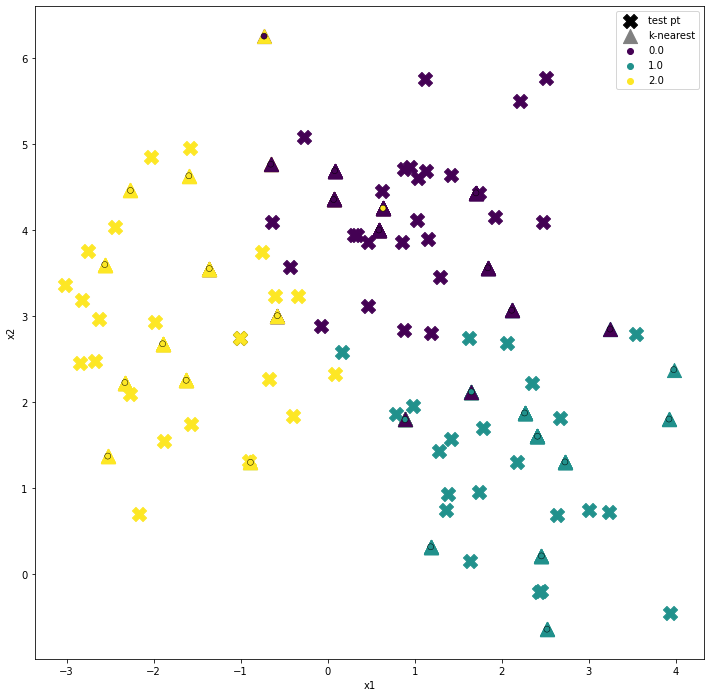

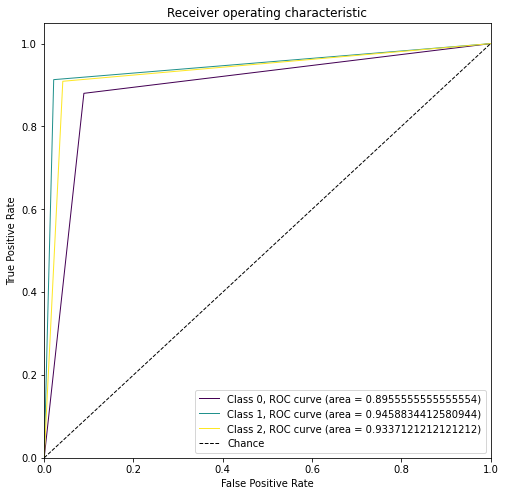

In [13]:
### get data
X, y = datasets.make_blobs(
    n_samples=100,
    centers=3,
    n_features=2,
    random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.70,
    random_state=73
)

### do knn
kn_indices, kn_distances, kn_pts, y_pred = knsc.run_knn(
    X_train,
    X_test, 
    y_train,
    y_test,
    k=5
)

knsc.plot_test_pts_w_l2_circles(
    X_train,
    X_test,
    y_train,
    kn_indices,
    kn_distances,
    kn_pts,
    y_pred,
    circles=False
)

rocs = knsc.roc_auc_plot(y_test, y_pred)

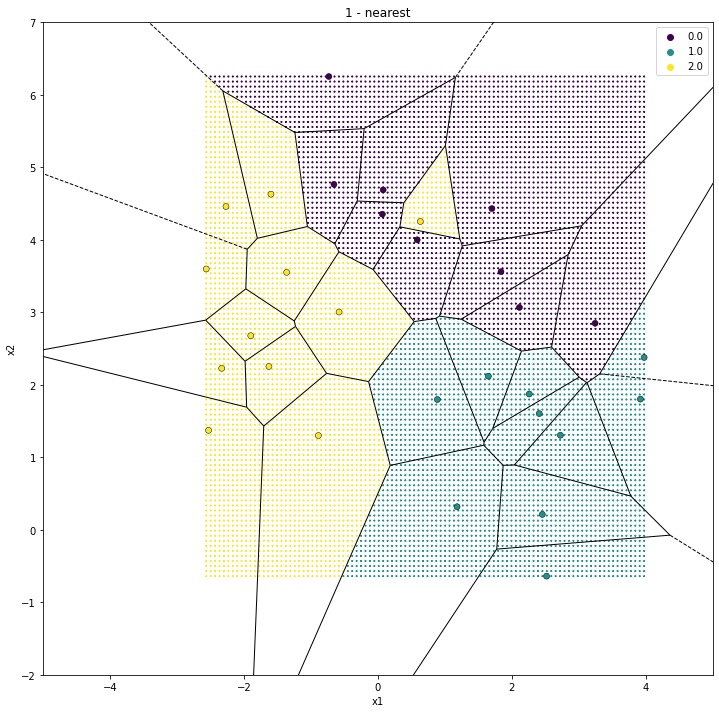

In [14]:
### show Voroni connection
vor = Voronoi(X_train)

# plot_voroni_train(X_train, y_train, vor)

lattice = knsc.gen_X_test_lattice(X_train, N=100)
X_test_dense = np.column_stack((lattice[0].ravel(), lattice[1].ravel()))

kn_indices_dense, kn_distances_dense, kn_pts_dense, y_pred_dense = knsc.run_knn(
    X_train,
    X_test_dense, 
    y_train,
    y_test,
    k=1
)

knsc.plot_voroni_test(X_train, X_test_dense, y_train, y_pred_dense, vor, k=1)

In [ ]:
### do ROC for many k, for fixed train test split, get mean, std roc_auc
# krocs = []
# for k in range(1, X_train.shape[0] + 1):
#     kn_indices, kn_distances, kn_pts, y_pred = run_knn(
#         X_train,
#         X_test, 
#         y_train,
#         y_test,
#         k=k
#     )
#     plot_test_pts_w_l2_circles(
#         X_train,
#         X_test,
#         y_train,
#         kn_indices,
#         kn_distances,
#         kn_pts,
#         y_pred,
#         circles=False
#     )
#     krocs.append(roc_auc_plot(y_test, y_pred))
#     del k, kn_indices, kn_distances, kn_pts, y_pred
### TODO krocs interpolate tpr and fpr arrays to same len to do aucroccurve avg,std


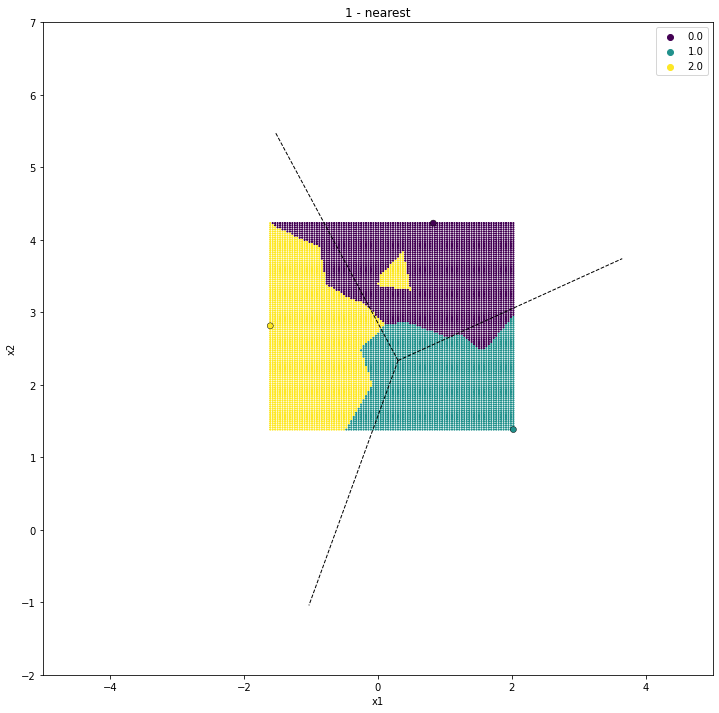

In [15]:
### for avg of X show decision boundary
X_avg = np.vstack(
    [np.mean(X_test[np.where(y_test == i)], axis=0) for i in np.unique(y_test)]
)
y_avg = np.unique(y_test)

vor_avg = Voronoi(X_avg)
lattice_avg = knsc.gen_X_test_lattice(X_avg, N=100)
X_avg_dense = np.column_stack((lattice_avg[0].ravel(), lattice_avg[1].ravel()))

(
    kn_indices_dense_avg,
    kn_distances_dense_avg,
    kn_pts_dense_avg, 
    y_pred_dense_avg
) = knsc.run_knn(
    X_train,
    X_avg, 
    y_train,
    y_avg,
    k=1
)

knsc.plot_voroni_test(X_avg, X_avg_dense, y_avg, y_pred_dense, vor_avg, k=1)

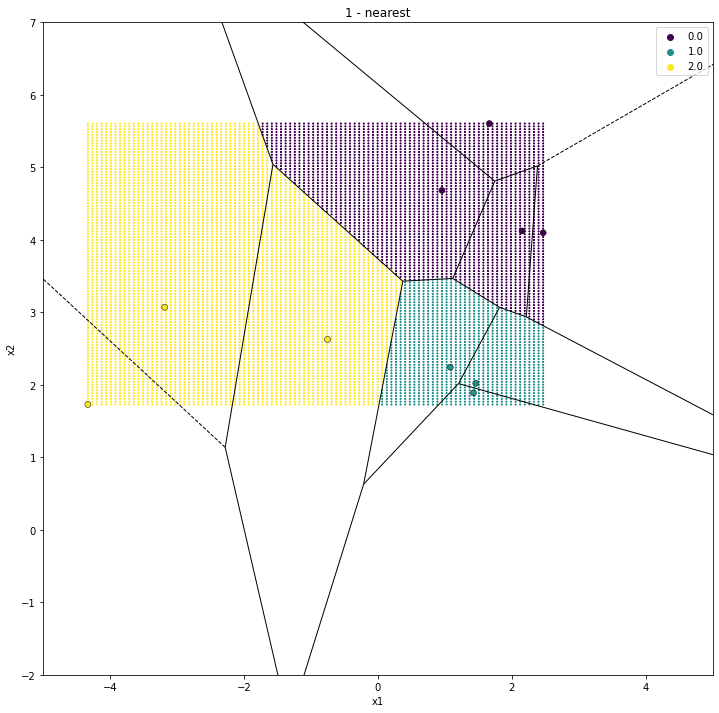

In [16]:
### show for very small train frac
X, y = datasets.make_blobs(
    n_samples=1000,
    centers=3,
    n_features=2,
    random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.99,
    random_state=73
)

### do knn
kn_indices, kn_distances, kn_pts, y_pred = knsc.run_knn(
    X_train,
    X_test, 
    y_train,
    y_test,
    k=5
)

vor = Voronoi(X_train)

lattice = knsc.gen_X_test_lattice(X_train, N=100)
X_test_dense = np.column_stack((lattice[0].ravel(), lattice[1].ravel()))

kn_indices_dense, kn_distances_dense, kn_pts_dense, y_pred_dense = knsc.run_knn(
    X_train,
    X_test_dense, 
    y_train,
    y_test,
    k=1
)

knsc.plot_voroni_test(X_train, X_test_dense, y_train, y_pred_dense, vor, k=1)